In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
plt.rcParams['figure.figsize'] = (10, 7)

![Titanic Route](https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Titanic_voyage_map.png/450px-Titanic_voyage_map.png)

## Daten lesen und analysieren

In [34]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:xlabel='Pclass', ylabel='count'>

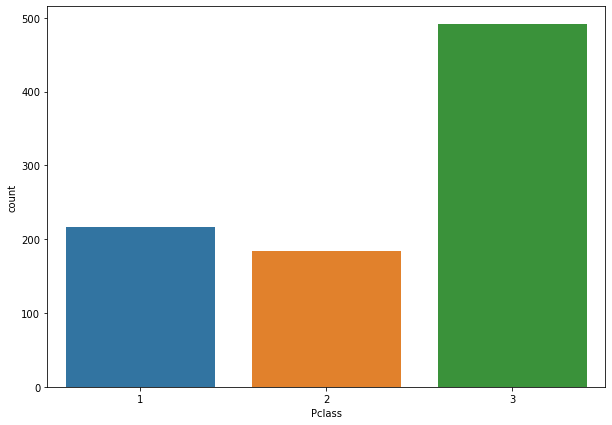

In [4]:
sns.countplot(x='Pclass', data=titanic)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

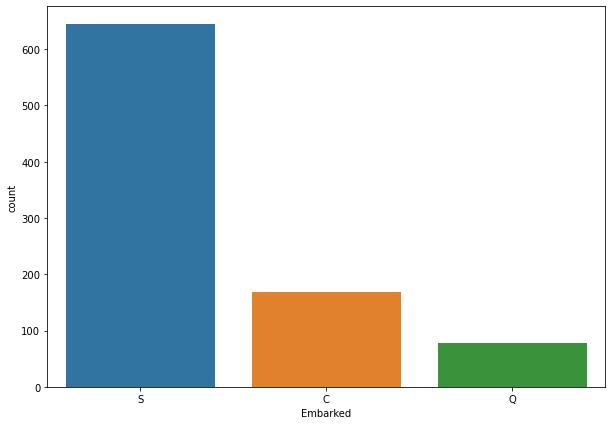

In [5]:
sns.countplot(x='Embarked', data=titanic)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.loc[:, ('Cabin', 'Pclass')].groupby('Pclass').count()

Cabin
Pclass       
1         176
2          16
3          12

In [8]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<AxesSubplot:xlabel='Survived', ylabel='count'>

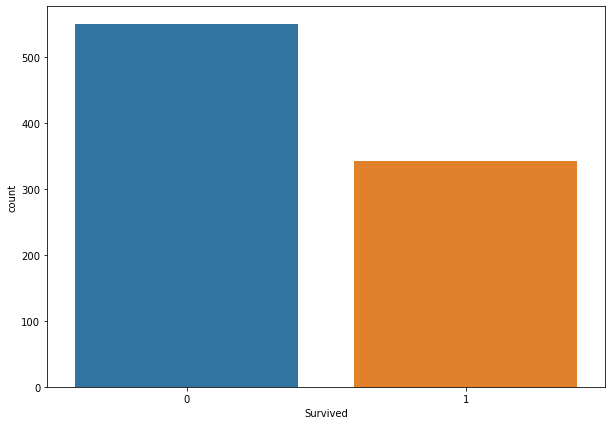

In [9]:
sns.countplot(x='Survived', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

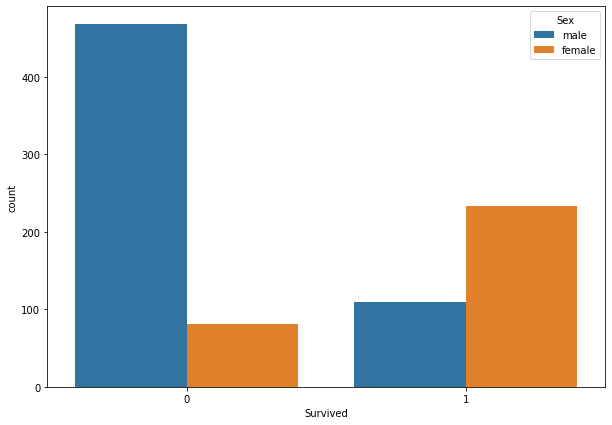

In [10]:
sns.countplot(x='Survived', hue='Sex', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

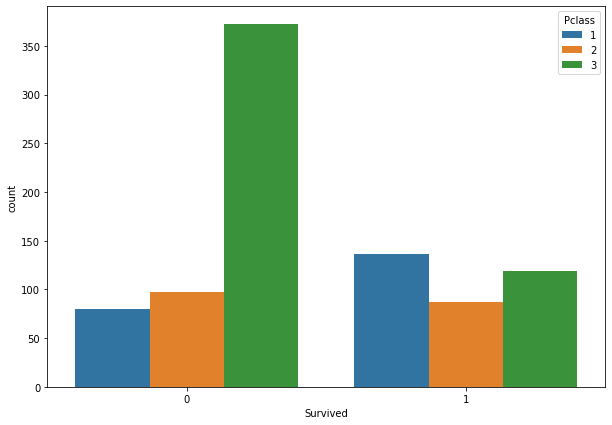

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

<AxesSubplot:xlabel='Age', ylabel='Density'>

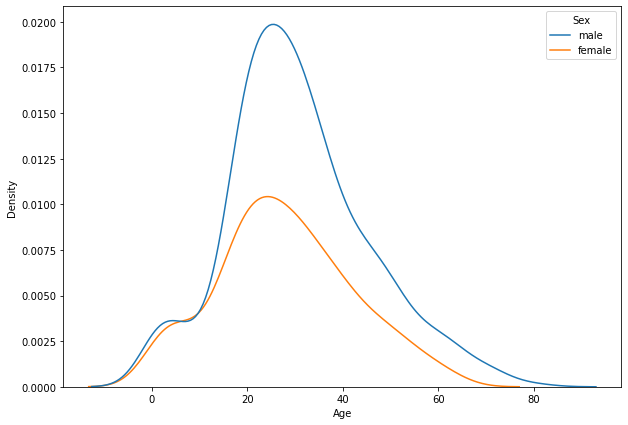

In [12]:
sns.kdeplot(x='Age', data=titanic, hue="Sex")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

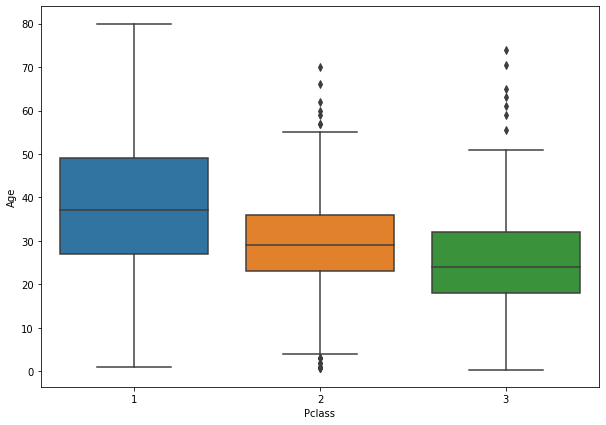

In [13]:
sns.boxplot(y='Age', x='Pclass', data=titanic)

In [14]:
titanic.isnull()\
    .sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Fehlende Daten entfernen

1. *Feature* `Cabin` löschen
2. Die beiden *Observations* mit `Embarked = NaN` droppen
3. Durch Mittelwerte abhängig von `Pclass` ersetzen

In [35]:
titanic.drop(['Cabin'], axis=1, inplace=True)

In [16]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [36]:
titanic.drop(titanic[titanic['Embarked'].isnull()].index, inplace=True)

In [18]:
titanic.isnull()\
    .sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [37]:
titanic.groupby('Pclass')['Age']\
    .mean()

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [38]:
titanic['Age'] = titanic.groupby('Pclass')['Age']\
    .apply(lambda age:
                            age.fillna(age.mean()))

In [39]:
titanic.isnull()\
    .sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
titanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.00000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00000      1   
2                             Heikkinen, Miss. Laina  female  26.00000      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00000      1   
4                           Allen, Mr. William Henry    male  35.00000      0   
5                                   Moran, Mr. James    male  25.14062      0   
6                            McCarthy, Mr. Timothy J    male  54.00000      0   
7                     Palsson, Master. Gosta Leonard    male   2.00000      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.00000      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.00000      1   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
5      0            330877   8.4583        Q  
6      0             17463  51.8625        S  
7      1            349909  21.0750        S  
8      2            347742  11.1333        S  
9      0            237736  30.0708        C

## Nicht relevate Spalten entfernen: PassengerId, Name, Ticket

In [40]:
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

## Women and children first

* *Feature Engineering*
* neue Features aus bekannten erzeugen

In [41]:
def add_sex_child(passenger):
    sex, age = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [42]:
titanic['Passenger'] = titanic.loc[:, ['Sex', 'Age']].apply(add_sex_child, axis = 1)

In [43]:
titanic.drop('Sex', axis=1, inplace=True)
titanic.head(8)

Survived  Pclass       Age  SibSp  Parch     Fare Embarked Passenger
0         0       3  22.00000      1      0   7.2500        S      male
1         1       1  38.00000      1      0  71.2833        C    female
2         1       3  26.00000      0      0   7.9250        S    female
3         1       1  35.00000      1      0  53.1000        S    female
4         0       3  35.00000      0      0   8.0500        S      male
5         0       3  25.14062      0      0   8.4583        Q      male
6         0       1  54.00000      0      0  51.8625        S      male
7         0       3   2.00000      3      1  21.0750        S     child

## One Hot Encoding für Passenger, Embarked

In [46]:
gender = pd.get_dummies(titanic['Passenger'], drop_first=True)
gender.head(8)

female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1
5       0     1
6       0     1
7       0     0

In [51]:
embarked_encoder = OneHotEncoder(sparse=False, drop='first')
embarked = embarked_encoder.fit_transform(titanic['Embarked'].values.reshape(-1, 1))
embarked = pd.DataFrame(embarked,
                             columns=embarked_encoder.categories_[0][1:],
                             index = titanic['Embarked'].index)

embarked.head(10)

Q    S
0  0.0  1.0
1  0.0  0.0
2  0.0  1.0
3  0.0  1.0
4  0.0  1.0
5  1.0  0.0
6  0.0  1.0
7  0.0  1.0
8  0.0  1.0
9  0.0  0.0

In [29]:
titanic.drop(['Passenger', 'Embarked'], axis=1, inplace=True)

In [30]:
titanic = pd.concat([titanic, gender, embarked], axis=1)
titanic.head()

Survived  Pclass   Age  SibSp  Parch     Fare  female  male    Q    S
0         0       3  22.0      1      0   7.2500       0     1  0.0  1.0
1         1       1  38.0      1      0  71.2833       1     0  0.0  0.0
2         1       3  26.0      0      0   7.9250       1     0  0.0  1.0
3         1       1  35.0      1      0  53.1000       1     0  0.0  1.0
4         0       3  35.0      0      0   8.0500       0     1  0.0  1.0

In [31]:
titanic.to_csv('./data/titanic-cleaned.csv', index=False)